In [2]:
import pandas as pd
import seaborn as sns

#import dataset from local device
tweet_data = pd.read_csv('./Data/tweet.csv')
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      1015 non-null   object
 1   sentiment  1015 non-null   object
dtypes: object(2)
memory usage: 16.0+ KB


In [3]:
#sample data from the data frame
tweet_data.head(10)

,tweet,sentiment
0,உன்னைத்தொட்டால் உன்னுள்ளத்தை நொருக்கமாட்டியோ!!...,Happy
1,உறக்கம் விற்று கனவுகள் வாங்கலையா?! #TamilLyric...,Sad
2,மீண்டும் உன்னை காணும் மனமே ... வேண்டும் எனக்கே...,Sad
3,உயிரை தொலைத்தேன் அது உன்னில் தானோ ... இது நான்...,Sad
4,ஒரு வீதி பத்தாதே. ஊரு பத்தாதே. நாம இறங்கி கலக்...,Happy
5,அழகளந்திடும் கருவிகள்\r\nசெயலிழந்திடும் அவளிடம...,Happy
6,"அழகான மனைவி, அன்பான துணைவி, அமைந்தாலே பேரின்பம...",Happy
7,ஒரே ஒரு பார்வை தந்தாலென்ன தேனே \r\nஒரே ஒரு வா...,Sad
8,அவள் சிக்கெடுக்கும் கூந்தலுக்கு சீப்பாக இருப்ப...,Sad
9,ஓரிரு வார்த்தை தப்பாய் போனால் உதடு கடிப்பாய்… ...,Happy


In [4]:
tweet_data.isnull().sum()

tweet        0
sentiment    0
dtype: int64

Sad      509
Happy    506
Name: sentiment, dtype: int64


<AxesSubplot:xlabel='sentiment', ylabel='count'>

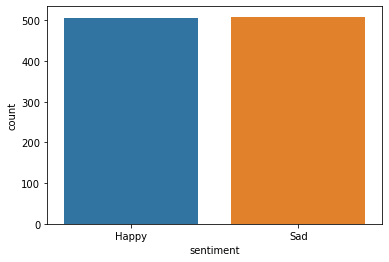

In [5]:
print(tweet_data['sentiment'].value_counts())
sns.countplot(x=tweet_data['sentiment'])

# Data Cleaning

In [6]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [7]:
import re  
import string
import emoji

def clean(tweet):
    cleaned = re.sub(r'[a-zA-Z0-9]',' ',tweet)
    cleaned = re.sub('\s',' ',cleaned)
    cleaned = re.sub(r'_',' ',cleaned)
    cleaned = re.sub(r'…','',cleaned)
    cleaned ="".join([t for t in cleaned if t not in string.punctuation])
    cleaned = emoji.demojize(cleaned, delimiters=(" ", " "))

    return cleaned

In [8]:
tweet_data['cleaned'] = tweet_data['tweet'].map(clean)

tweet_data.sample(10)

,tweet,sentiment,cleaned
735,காலை வணக்கம் .......🥰🥰🥰🥰\r\nஅன்பு நண்பர்களே .....,Happy,காலை வணக்கம் smiling_face_with_hearts smilin...
108,🎼அன்பை_அளந்திட_எந்த_மொழியும்_போதாது...😍❤😍❤😍❤\r...,Happy,musical_score அன்பை அளந்திட எந்த மொழியும் போத...
389,மழைக்கால அணைக்கட்டாய்\r\nமனதிற்குள் தளும்பிக்க...,Happy,மழைக்கால அணைக்கட்டாய் மனதிற்குள் தளும்பிக்கொண...
930,மீள்பகிர்வு: இங்கே கொரோனா\r\nதொற்று நாளுக்குநா...,Sad,மீள்பகிர்வு இங்கே கொரோனா தொற்று நாளுக்குநாள் ...
8,அவள் சிக்கெடுக்கும் கூந்தலுக்கு சீப்பாக இருப்ப...,Sad,அவள் சிக்கெடுக்கும் கூந்தலுக்கு சீப்பாக இருப்ப...
90,"எண்ணம் முழுவதும் \r\nநீயே எங்கும் ,\r\nஉன்னை க...",Sad,எண்ணம் முழுவதும் நீயே எங்கும் உன்னை காண ...
360,அன்பு ஒன்று தான் அநாதை\r\nபாசம் ஒன்று தான் பரு...,Happy,அன்பு ஒன்று தான் அநாதை பாசம் ஒன்று தான் பருப்...
791,"அரசுக்கு பணம் தான் முக்கியம், பல்லி இருந்து கு...",Sad,அரசுக்கு பணம் தான் முக்கியம் பல்லி இருந்து குட...
641,"நாடே கொண்டாட்டத்துல இருக்கு, நீங்க என்னங்க இப்...",Sad,நாடே கொண்டாட்டத்துல இருக்கு நீங்க என்னங்க இப்ப...
338,எல்லா பிரச்சினை யும் முடிந்தது..\r\n#சிம்பு அண...,Happy,எல்லா பிரச்சினை யும் முடிந்தது சிம்பு அண்ணா அ...


In [9]:
import collections

cleaned_text = tweet_data['cleaned'].str.cat(sep=' ')
splited = cleaned_text.split()
most_common = (collections.Counter(splited)).most_common(20)
most_common

[('பாசம்', 376),
 ('என்', 162),
 ('காதல்', 150),
 ('தான்', 137),
 ('அன்பு', 129),
 ('ஒரு', 127),
 ('smiling_face_with_heart-eyes', 123),
 ('red_heart', 119),
 ('மழை', 118),
 ('நீ', 113),
 ('சோகம்', 102),
 ('நான்', 93),
 ('உன்', 93),
 ('இந்த', 67),
 ('இல்லை', 62),
 ('folded_hands', 58),
 ('என்ன', 56),
 ('fire', 54),
 ('என்று', 53),
 ('பணம்', 52)]

In [10]:
X = tweet_data['cleaned']
y = tweet_data['sentiment']

# Tamil stopwords removing

In [11]:
my_file = open("./Data/TamilStopWords.txt", encoding="utf8")
content = my_file.read()
content_list = content.split("\n")
my_file.close()

print(content_list[:10])

['ஒரு', 'என்று', 'மற்றும்', 'இந்த', 'இது', 'என்ற', 'கொண்டு', 'என்பது', 'பல', 'ஆகும்']


# Vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features= 1000,  stop_words = content_list)
X_vectors = vectorizer.fit_transform(X)


print(X[11])
print(X_vectors[1])

சிந்தனையில் வந்துவந்து போறா  அவ சந்தனத்தில் செஞ்சுவெச்ச தேரா             
  (0, 614)	0.14863509574262085
  (0, 950)	0.4162754754196546
  (0, 494)	0.4432250950687617
  (0, 481)	0.2312448056912999
  (0, 486)	0.43247811171546646
  (0, 467)	0.5873097372776035
  (0, 471)	0.15076354733734357


C:\Users\Abi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['அங', 'அட', 'அத', 'அதன', 'அதற', 'அந', 'அன', 'அல', 'அவ', 'அவன', 'அவர', 'அவரத', 'அவள', 'ஆக', 'இங', 'இடத', 'இடம', 'இத', 'இதன', 'இதற', 'இந', 'இன', 'இப', 'இர', 'இவ', 'இவர', 'உன', 'உள', 'எந', 'எனக', 'எனப', 'எனவ', 'எல', 'ஏன', 'ஒர', 'ஓர', 'கள', 'கவ', 'சற', 'தக', 'தத', 'தன', 'தனத', 'தப', 'தல', 'தவ', 'னர', 'பட', 'பத', 'பற', 'பலர', 'மட', 'மற', 'றக', 'லத', 'ளத', 'ளன', 'வந', 'வர'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


# Choosing best model

In [13]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# Initialze the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

In [14]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]

In [16]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring).fit(X_vectors, y)

C:\Users\Abi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.62561576 0.6955665  0.7182266  0.72413793 0.69359606 0.72906404
 0.73596059 0.73891626 0.69655172 0.73300493 0.74581281 0.74384236
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.50147783        nan        nan        nan 0.51527094        nan
        nan        nan 0.72807882        nan        nan        nan
 0.73103448        nan        nan        nan 0.73103448        nan
        nan        nan        nan 0.68965517        nan        nan
        nan        nan        nan        nan        nan

In [17]:
print(gs.best_params_)
print(gs.best_score_)

{'classifier': RandomForestClassifier(max_depth=20, random_state=42), 'classifier__class_weight': None, 'classifier__max_depth': 20, 'classifier__n_estimators': 100}
0.7458128078817734


# Creating final model with selected parameters

In [19]:
#RandomForestClassifier gave best score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

final_model = RandomForestClassifier(max_depth=20, random_state=42, n_estimators= 100)
print(cross_val_score(final_model, X_vectors, y, cv = 5).mean())

0.7458128078817734


In [20]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

# Nested CV with parameter optimization
nested_score = cross_val_score(final_model, X=X_vectors, y=y, cv=5, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score )

              precision    recall  f1-score   support

       Happy       0.80      0.44      0.57       102
         Sad       0.61      0.89      0.73       101

    accuracy                           0.67       203
   macro avg       0.71      0.67      0.65       203
weighted avg       0.71      0.67      0.65       203

              precision    recall  f1-score   support

       Happy       0.73      0.79      0.76       101
         Sad       0.77      0.71      0.74       102

    accuracy                           0.75       203
   macro avg       0.75      0.75      0.75       203
weighted avg       0.75      0.75      0.75       203

              precision    recall  f1-score   support

       Happy       0.71      0.65      0.68       101
         Sad       0.68      0.74      0.71       102

    accuracy                           0.69       203
   macro avg       0.70      0.69      0.69       203
weighted avg       0.70      0.69      0.69       203

              preci

In [21]:
final_model.fit(X_vectors,y)
test_set = ['அருகில் இருந்தும் காதல் பிாிவில் பெருகிடுமே','உன் நெனப்புல நான் வாட என் உசுருல நீ தேட']
new_test = vectorizer.transform(test_set)

final_model.predict(new_test)

array(['Sad', 'Sad'], dtype=object)